Initialize necessary packages

In [2]:
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy import stats
import ast


DT Target analysis; data setup. Reads data in from csvs, and pulls out momentum & position direction and magnitude & energy

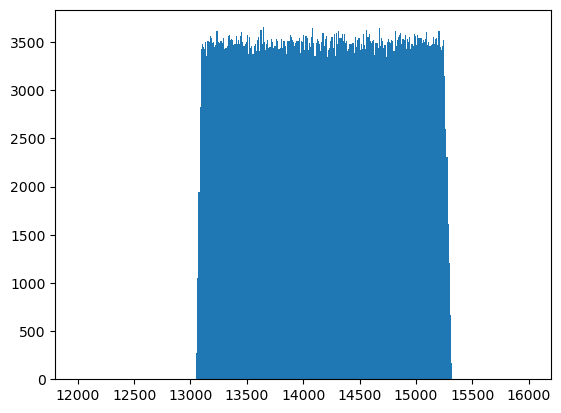

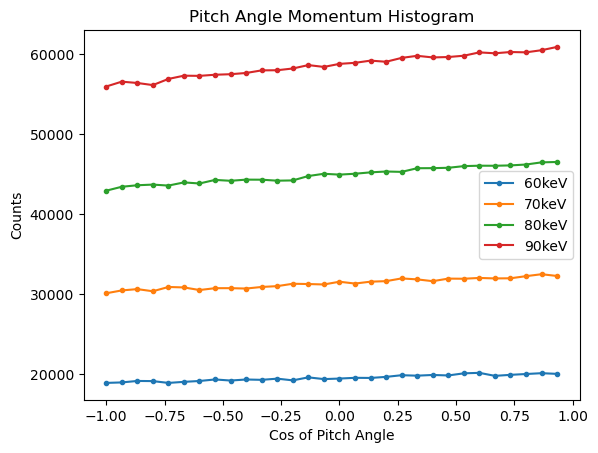

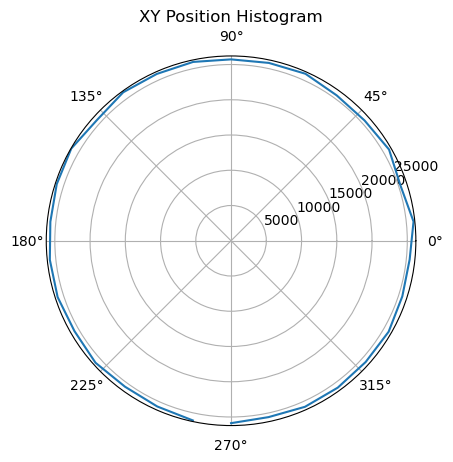

Average Energy || Number of events
14179.02       || 773193


In [4]:

df_DT_Test = pd.read_csv("DT_1e9_280keV_1219.csv", delimiter=";", names = ["Energy","Position","Momentum","ParticleID"])
df_60_keV_Test = pd.read_csv("DT_1e9_60keV_1222.csv", delimiter=";", names = ["Energy","Position","Momentum","ParticleID"])
energy_60keV_data = df_60_keV_Test['Energy']
momentum_60keV_data = df_60_keV_Test['Momentum']
momentum_cos_60keV_data = np.cos(momentum_60keV_data)
df_70_keV_Test = pd.read_csv("DT_1e9_70keV_1222.csv", delimiter=";", names = ["Energy","Position","Momentum","ParticleID"])
energy_70keV_data = df_70_keV_Test['Energy']
momentum_70keV_data = df_70_keV_Test['Momentum']
momentum_cos_70keV_data = np.cos(momentum_70keV_data)
df_80_keV_Test = pd.read_csv("DT_1e9_80keV_1222.csv", delimiter=";", names = ["Energy","Position","Momentum","ParticleID"])
energy_80keV_data = df_80_keV_Test['Energy']
momentum_80keV_data = df_80_keV_Test['Momentum']
momentum_cos_80keV_data = np.cos(momentum_80keV_data)
df_90_keV_Test = pd.read_csv("DT_1e9_90keV_1222.csv", delimiter=";", names = ["Energy","Position","Momentum","ParticleID"])
energy_90keV_data = df_90_keV_Test['Energy']
momentum_90keV_data = df_90_keV_Test['Momentum']
momentum_cos_90keV_data = np.cos(momentum_90keV_data)
energy_data = df_DT_Test ['Energy'] # grabs energy and tof data from compy csv output
momentum_data = df_DT_Test ['Momentum']

p_cos = [momentum_cos_60keV_data,momentum_cos_70keV_data,momentum_cos_80keV_data,momentum_cos_90keV_data]
nrg_l = [energy_60keV_data, energy_70keV_data, energy_80keV_data, energy_90keV_data]
#momentum_data = momentum_data.apply(ast.literal_eval)
#momentum_x = momentum_data.apply(lambda x: x[0])
#momentum_y = momentum_data.apply(lambda x: x[1])
#momentum_z = momentum_data.apply(lambda x: x[2])
#momentum_theta = np.arctan(momentum_y/momentum_x)
#print(momentum_theta[30])
#for i in range(len(momentum_x)):
#    if momentum_x[i]<0:
#        momentum_theta[i] = momentum_theta[i] + np.pi
momentum_cos = np.cos(momentum_data)
position_data = df_DT_Test ['Position']
position_data = position_data.apply(ast.literal_eval)
position_x = position_data.apply(lambda x: x[0])
position_y = position_data.apply(lambda x: x[1])
position_z = position_data.apply(lambda x: x[2])
position_theta = np.arctan(position_y/position_x)
for i in range(len(position_x)):
    if position_x[i]<0:
        position_theta[i] = position_theta[i] + np.pi
position_r = np.sqrt(np.square(position_x)+np.square(position_y))
position_phi = np.arctan(position_z/position_r)
for i in range(len(position_phi)):
    if position_z[i] <0:
        position_phi[i] += np.pi
bin_number = 30
p_hist, p_edges = np.histogram(momentum_cos,bins=bin_number)
p_bins = p_edges[0:bin_number]
p_hist = p_hist[0:bin_number]
pos_hist, pos_edges = np.histogram(position_theta,bins=bin_number)
pos_bins = pos_edges[0:bin_number]
p_cos_hist_l = []
p_cos_edge_l = []
for cos in p_cos:
    cos_hist,cos_edges = np.histogram(cos,bins=bin_number)
    p_cos_hist_l.append(cos_hist)
    p_cos_edge_l.append(cos_edges[0:bin_number])
#introduce energy chunking by theta

plt.figure()
plt.hist(energy_data,bins=400,range=(12000,16000))
#fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig,ax = plt.subplots()
bin_diameter = np.sin(p_bins)*np.pi*2
p_hist_SA = p_hist/bin_diameter
p_hist_norm = p_hist/p_hist.max()

energies = [60,70,80,90]
for plot,edges,energy in zip(p_cos_hist_l,p_cos_edge_l,energies):
    ax.plot(edges,plot, label = str(energy)+'keV', marker = '.')
ax.set_title("Pitch Angle Momentum Histogram")
ax.set_xlabel("Cos of Pitch Angle")
ax.set_ylabel("Counts")
ax.legend()
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(pos_bins,pos_hist)
ax.set_title("XY Position Histogram")
plt.show()
print("Average Energy || Number of events")
print(round(np.mean(energy_data),2),"      ||", len(energy_data))
#print(momentum_x)
#hist, edges = np.histogram(energy_data, bins = bin_number)
#bins = edges[0:bin_number]




Makes a histogram of energy by angle bin. Takes one data set with energy and angle data. 

-4.99999 4.99998
15274.307650358367
15234.847368393966
15157.041615644135
15043.163821579543
14897.697971664069
14727.916948552946
14539.423268250353
14339.012881476752
14134.624316353886
13933.127042735305
13741.411194177641
13565.52400241727
13410.443871730957
13281.258525017785
13181.49548603594
13113.431314644755
13080.178006299797


Text(0, 0.5, 'Counts')

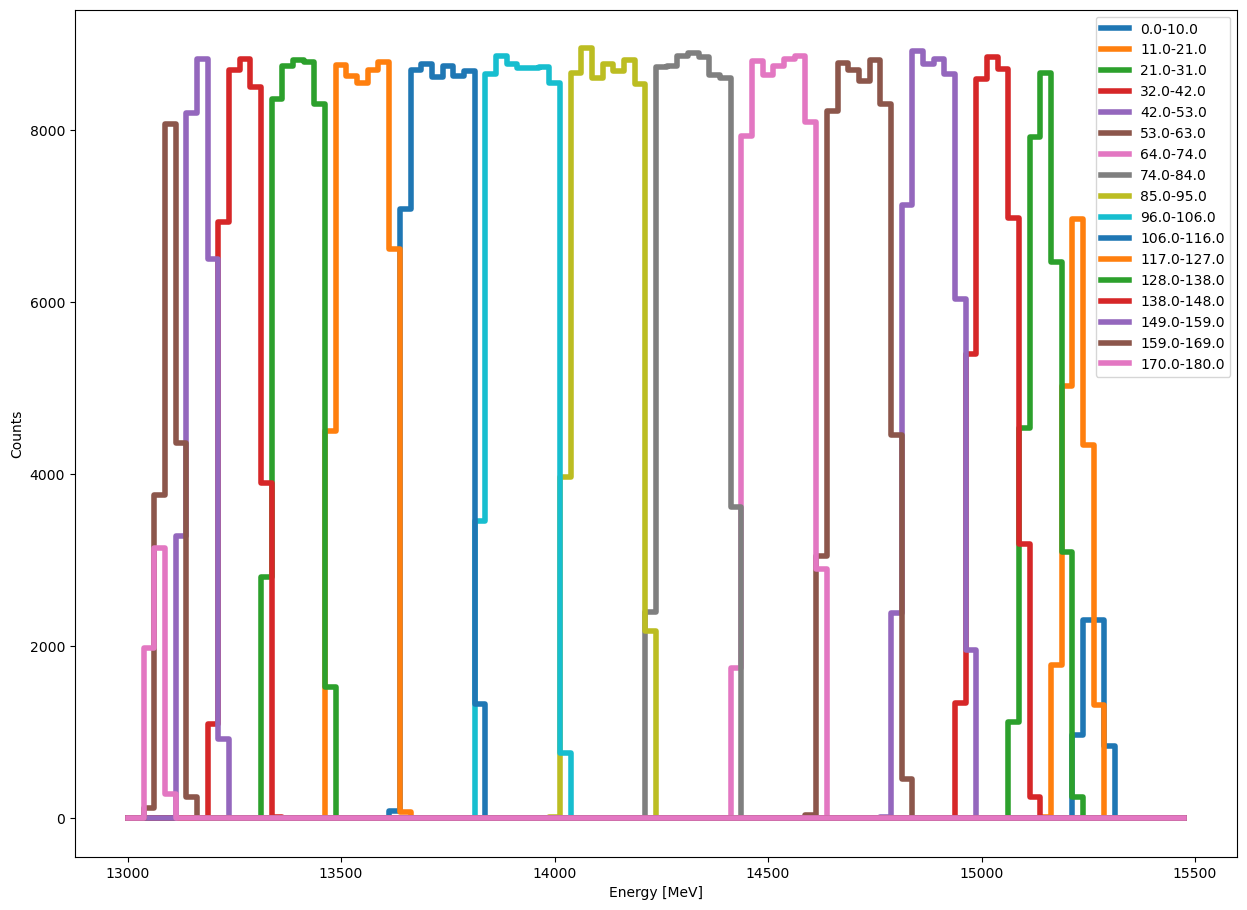

In [136]:
energy_theta = []
diffs = 18
angles = np.linspace(0,180-180/diffs,diffs-1)#
rads = np.deg2rad(angles)
#print(rads[0],rads[1])
plt.figure(figsize=(15,11))
legend = []
bins = 100
print(position_x.min(),position_x.max())
for angle in rads:
    energy_theta = []
    #z_min = np.cos(angle+np.pi/12)
    #z_max = np.cos(angle)
    for i in range(len(position_theta)):
        #r = np.sqrt((position_x[i]**2+position_y[i]**2+position_z[i]**2))
        #if z_min <position_z[i] < z_max:
        if angle < momentum_data[i] < angle+np.pi/diffs:
            #if -4<position_x[i]<4:
            #if (np.pi/6)>position_phi[i]>-np.pi/6:
            #if angle<np.arctan(position_z[i]/position_x[i])<(angle+np.pi/12) and position_x[i]>0:
                #print(position_theta[i])
                energy_theta.append(energy_data[i])
    ang_hist, ang_edges = np.histogram(energy_theta,bins,range=(13000,15500))
    ang_bins = ang_edges[0:bins]
    plt.plot(ang_bins,ang_hist,drawstyle = 'steps-mid',linewidth = 4.0)
    legend.append(str(np.round(np.rad2deg(angle),0)) + "-"+str(np.round(np.rad2deg(angle+np.pi/diffs),0)))
    print(np.mean(energy_theta))
plt.legend(legend)
plt.xlabel("Energy [MeV]")
plt.ylabel("Counts")

Makes linear fits for cos vs. energy data. Takes momentum cos and energy data from n data sets

In [5]:
p0, p1 = np.polyfit(momentum_cos,energy_data,1)
x_space = np.linspace(momentum_cos.min(),momentum_cos.max(),100)
def linfunc (x,a,b):
    return a+b*x
#optimize.curve_fit(linfunc,xdata=momentum_cos,ydata=energy_data,)
print('slope: '+str(p0)+' , intercept: '+str(p1))

slopes = []
intercepts = []
for cos, energy in zip(p_cos,nrg_l):
    m, b = np.polyfit(cos,energy,1)
    slopes.append(m)
    intercepts.append(b)

slope: 1106.2303956315077 , intercept: 14148.83585779144


Linear fit for the Milocco dataset, a reference to benchmark our simulation against at 280 keV

In [6]:
df_PaperDat = pd.read_csv("Relativistic Milocco Dataset.csv", delimiter=",", names = ["Cos","Energy"])
lin0, lin1 = np.polyfit(df_PaperDat["Cos"],df_PaperDat["Energy"]*1000,1)

Chi2 of our data at 280 keV vs. Milocco data, takes linear regression and cos vs. energy data of 1 data set.

chi2 = 2.419963765051583


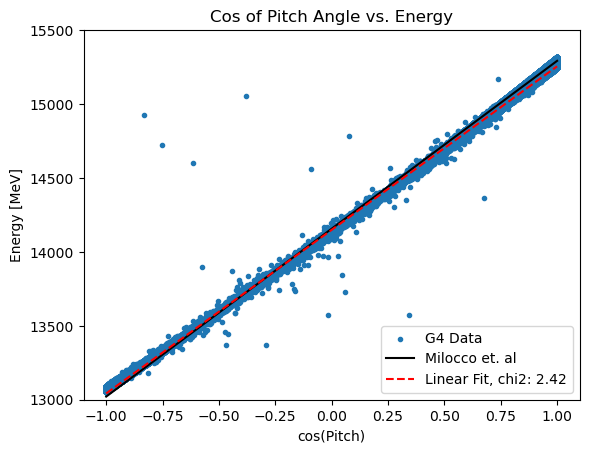

In [117]:
chi2 = sum((((x_space*lin0+lin1)-(p1+ x_space*p0))**2)/(x_space*lin0+lin1))
print("chi2 = "+ str(chi2))
ax = plt.subplot(title = "Cos of Pitch Angle vs. Energy",ylim=[13000,15500],
           xlabel = 'cos(Pitch)', ylabel = 'Energy [MeV]')
ax.scatter(momentum_cos,energy_data, marker = '.',label = 'G4 Data')
ax.plot(x_space, (x_space*lin0+lin1), color = 'black',label = 'Milocco et. al')
ax.plot(x_space, (p1+ x_space*p0),linestyle = 'dashed',color='red', label = 'Linear Fit, chi2: '+str(np.round(chi2,2)))
ax.legend()
#plt.legend(['G4 Data','Milocco et. al','Linear Fit'])
#plt.title("Cos vs. Energy")
#plt.ylim((13000,15500))
plt.show()

Summary plot of several energies. Currently hard coded to 4, can be changed to more

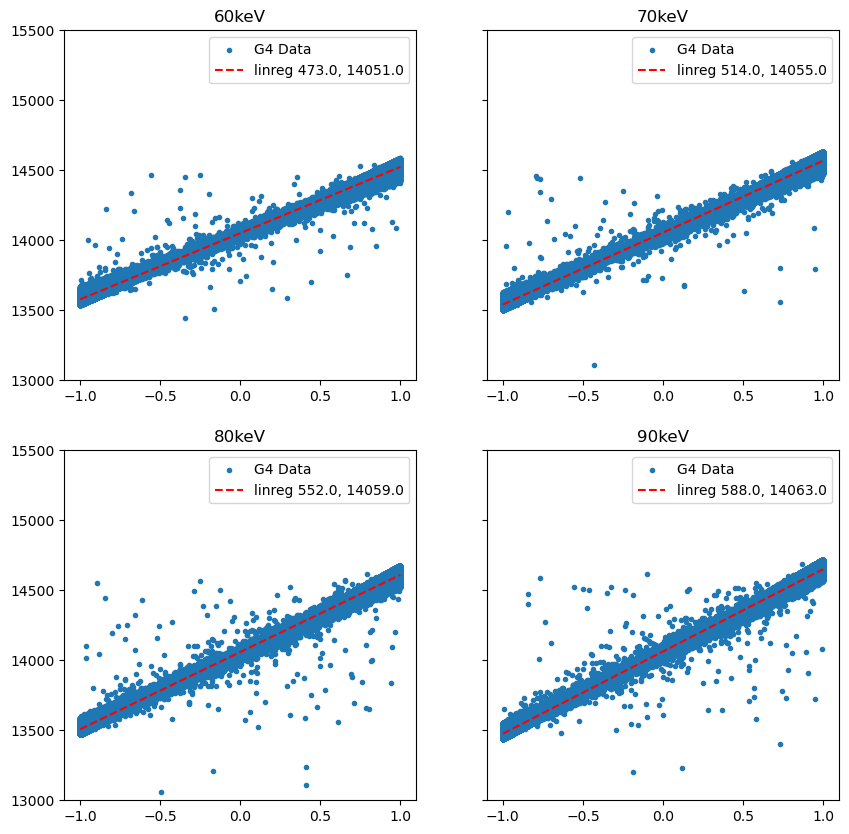

In [171]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,sharey='all')
axs = [ax1,ax2,ax3,ax4]
fig.set_label('Cos of Pitch Angle vs Energy for Various Energies')
fig.set_size_inches(10,10)
for ax,cos,energy,nrg_in,slope,intercept in zip(axs,p_cos,nrg_l,energies,slopes,intercepts):
    ax.scatter(cos,energy,label='G4 Data',marker='.')
    ax.set_title(str(nrg_in)+"keV")
    ax.plot(x_space,(x_space*slope+intercept),linestyle='dashed',color = 'red',label = 'linreg '+str(np.round(slope,0))+', '+str(np.round(intercept,0)))
    ax.set_ylim([13000,15500])
    ax.legend()

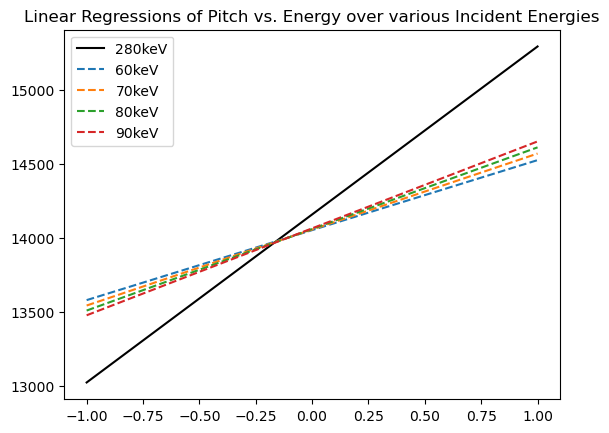

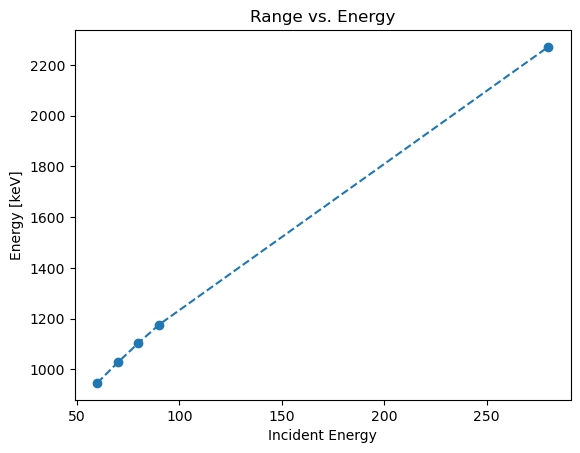

In [7]:
plt.figure()
plt.plot(x_space,(x_space*lin0+lin1),color='black',label = '280keV')
for slope,intercept,energy in zip(slopes,intercepts,energies):
    plt.plot(x_space,(x_space*slope+intercept),linestyle = 'dashed', label = str(energy)+'keV')
plt.legend()
plt.title('Linear Regressions of Pitch vs. Energy over various Incident Energies')
plt.show()
plt.figure()
ranges = [2*slopes[0],2*slopes[1],2*slopes[2],2*slopes[3],2*lin0]
plt.plot([60,70,80,90,280],ranges,linestyle = 'dashed',marker = 'o')
plt.title('Range vs. Energy')
plt.ylabel('Energy [keV]')
plt.xlabel('Incident Energy [keV]')
plt.show()

Analysis of C13-d collision

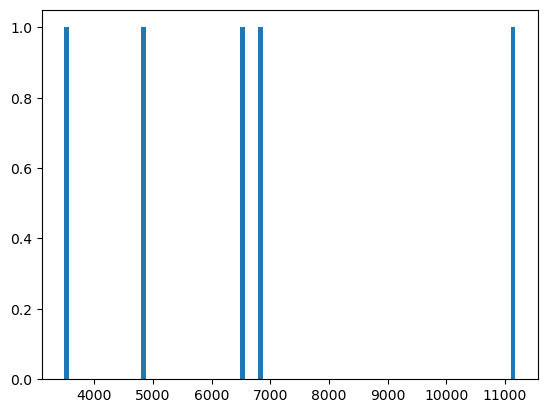

In [68]:
df_C13_Test = pd.read_csv("DC13_1e6_12_1.csv",delimiter=";", names=["Energy","Momentum","Position","ParticleID"])
c13_energy_data = df_C13_Test [df_C13_Test["ParticleID"] == "alpha"]["Energy"]
plt.figure()
plt.hist(c13_energy_data,bins=100)
plt.show()

Analyze Secondaries/Incident energy of deuteron

80 4108


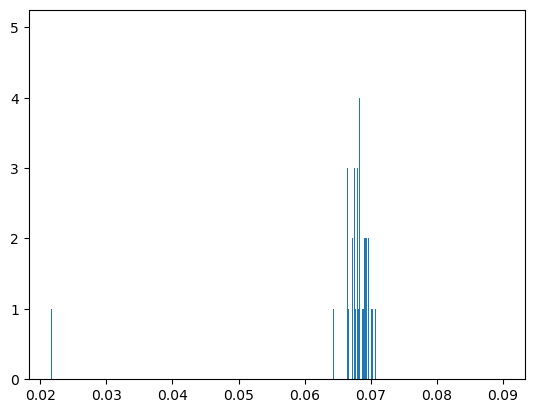

In [11]:
df_Secondaries = pd.read_csv("Secondaries.csv", names=["NumSecondaires"])
num_sec_data = df_Secondaries ["NumSecondaires"] [df_Secondaries ["NumSecondaires"] != 0.1]
print(len(num_sec_data),len(df_Secondaries)-len(num_sec_data))
plt.figure()
plt.hist(num_sec_data,bins=1000)
plt.show()